# Data exploration

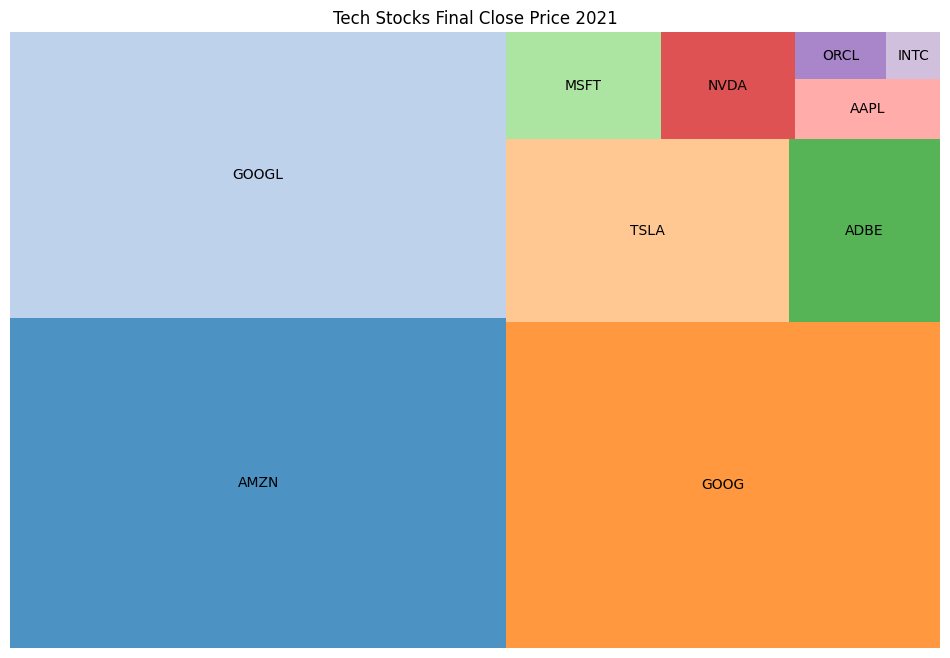

In [167]:
import os
import pandas as pd
import squarify
import matplotlib.pyplot as plt

tech_symbols = ['AAPL', 'MSFT', 'GOOGL', 'GOOG', 'AMZN', 'NVDA', 'INTC', 'TSLA', 'ORCL', 'ADBE']

data_folder = 'data'
csv_files = [f for f in os.listdir(data_folder) if f.split('.')[0] in tech_symbols]

final_close_prices = {}

for file in csv_files:
    stock_name = file.split('.')[0]  
    df = pd.read_csv(os.path.join(data_folder, file))
    if 'close' in df.columns: 
        final_close_prices[stock_name] = df['close'].iloc[-1] 

sorted_stocks = sorted(final_close_prices.items(), key=lambda x: x[1], reverse=True)
stock_names = [stock[0] for stock in sorted_stocks]
stock_values = [stock[1] for stock in sorted_stocks]

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=stock_values,
    label=stock_names,
    alpha=0.8,
    color=plt.cm.tab20(range(len(stock_names))),
)
plt.title('Tech Stocks Final Close Price 2021')
plt.axis('off')
plt.show()

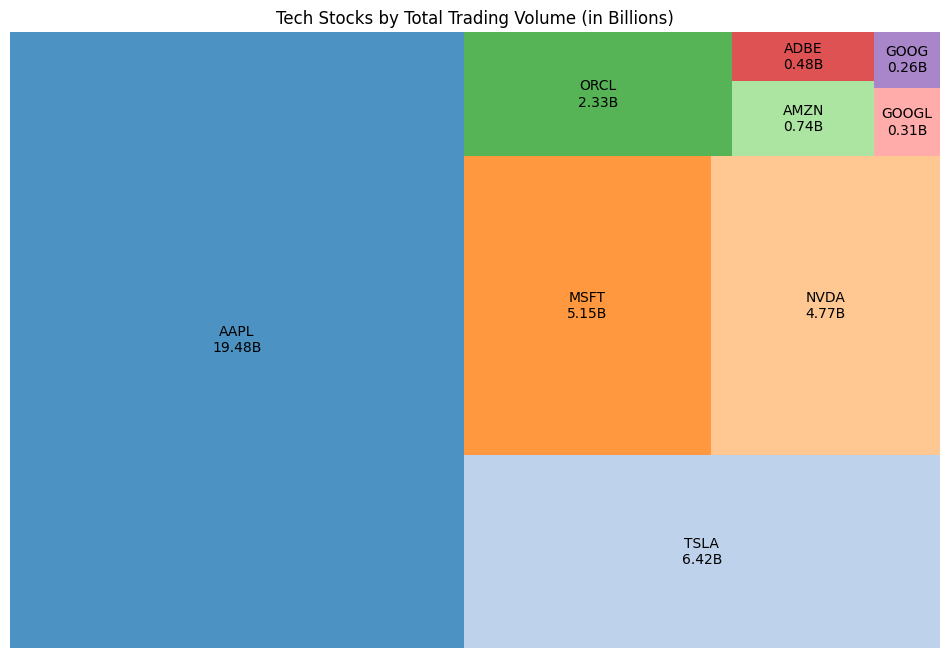

In [ ]:
import os
import pandas as pd
import squarify
import matplotlib.pyplot as plt

tech_symbols = ['AAPL', 'MSFT', 'GOOGL', 'GOOG', 'AMZN', 'NVDA', 'INTC', 'TSLA', 'ORCL', 'ADBE']

data_folder = 'data'
csv_files = [f for f in os.listdir(data_folder) if f.split('.')[0] in tech_symbols]

total_volumes = {}

for file in csv_files:
    stock_name = file.split('.')[0]  
    df = pd.read_csv(os.path.join(data_folder, file))
    if 'volume' in df.columns:  
        total_volumes[stock_name] = df['volume'].sum()  

sorted_stocks = sorted(total_volumes.items(), key=lambda x: x[1], reverse=True)
stock_names = [stock[0] for stock in sorted_stocks]
stock_volumes = [stock[1] for stock in sorted_stocks]

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=stock_volumes,
    label=[f"{name}\n{volume / 1_000_000_000:.2f}B" for name, volume in zip(stock_names, stock_volumes)],  # Simplify numbers to billions
    alpha=0.8,
    color=plt.cm.tab20(range(len(stock_names)))
)
plt.title('Tech Stocks by Total Trading Volume (in Billions)')
plt.axis('off')
plt.show()

# 1. Linear regression

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['AAPL', 'AMZN', 'MSFT', 'GOOGL']

dataframes = {ticker: pd.read_csv(f'data/{ticker}.csv') for ticker in tickers}

aapl_df = dataframes['AAPL']
amzn_df = dataframes['AMZN']
msft_df = dataframes['MSFT']
googl_df = dataframes['GOOGL']

print(aapl_df.head())

  ticker                       name                       date    open  \
0   AAPL  Apple Inc. - Common Stock  2021-01-04 04:00:00-05:00  133.31   
1   AAPL  Apple Inc. - Common Stock  2021-01-04 05:00:00-05:00  133.98   
2   AAPL  Apple Inc. - Common Stock  2021-01-04 06:00:00-05:00  133.68   
3   AAPL  Apple Inc. - Common Stock  2021-01-04 07:00:00-05:00  134.20   
4   AAPL  Apple Inc. - Common Stock  2021-01-04 08:00:00-05:00  133.75   

     high     low   close  adjusted close  volume  
0  134.00  133.02  133.74          133.74       0  
1  134.01  133.50  133.60          133.60       0  
2  134.43  133.43  134.22          134.22       0  
3  134.35  133.60  133.75          133.75       0  
4  134.10  133.53  134.02          134.02       0  


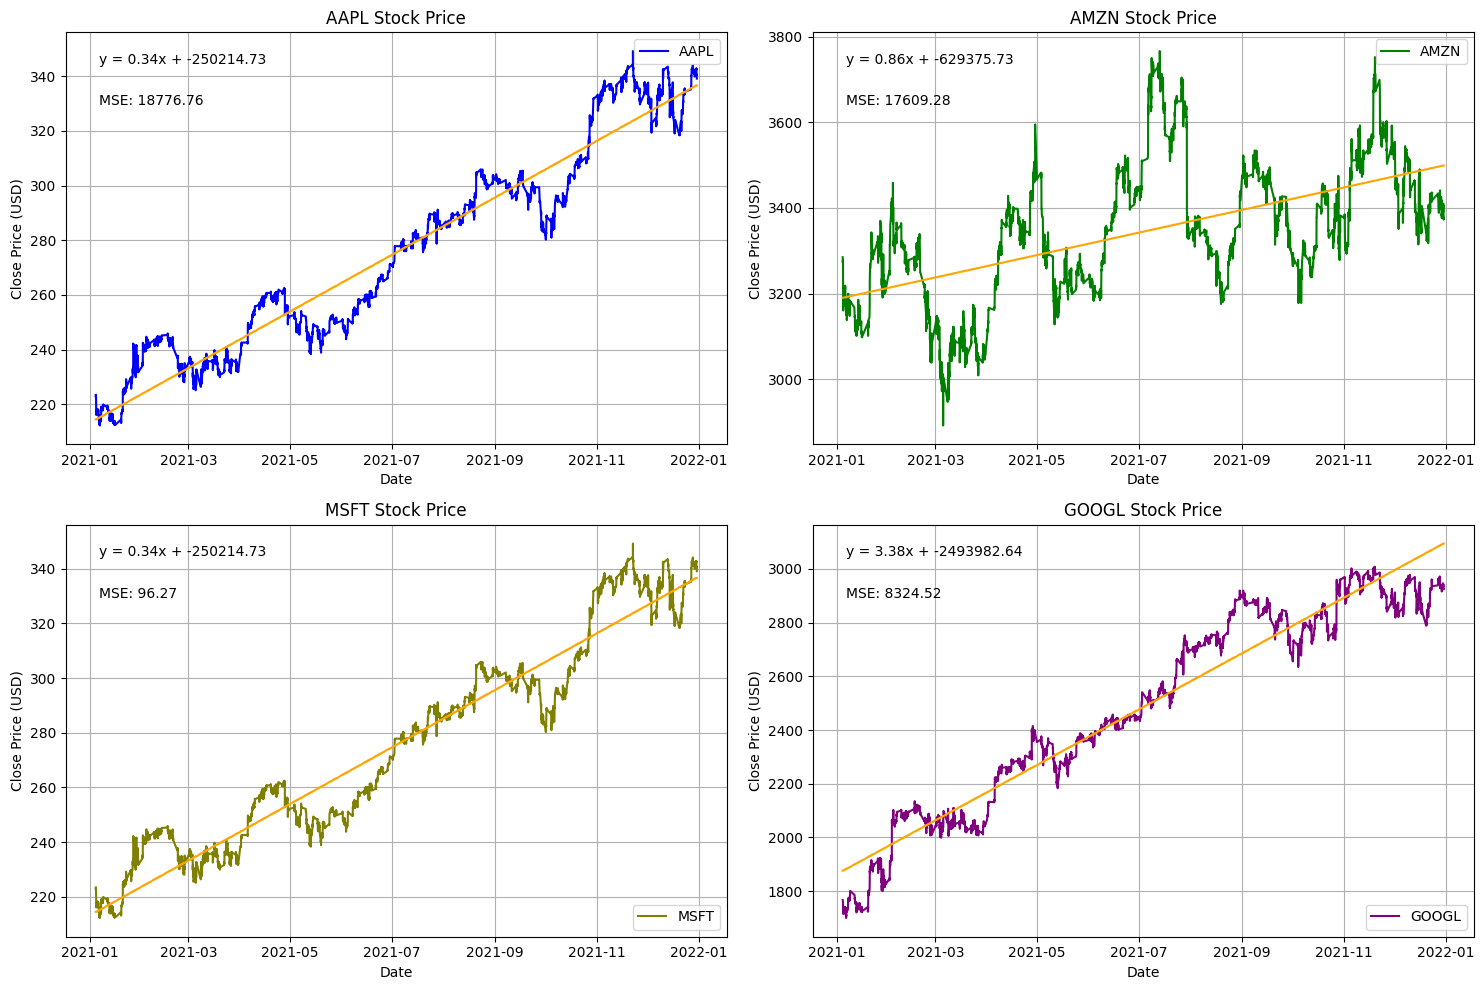

In [86]:
import numpy as np
from sklearn.metrics import mean_squared_error

aapl_df['date'] = pd.to_datetime(aapl_df['date'], utc = True)
amzn_df['date'] = pd.to_datetime(amzn_df['date'], utc = True)
msft_df['date'] = pd.to_datetime(msft_df['date'], utc = True)
googl_df['date'] = pd.to_datetime(googl_df['date'], utc = True)

aapl_df['date_numeric'] = aapl_df['date'].map(pd.Timestamp.toordinal)
amzn_df['date_numeric'] = amzn_df['date'].map(pd.Timestamp.toordinal)
msft_df['date_numeric'] = msft_df['date'].map(pd.Timestamp.toordinal)
googl_df['date_numeric'] = googl_df['date'].map(pd.Timestamp.toordinal)

aapl_fit = np.polyfit(msft_df['date_numeric'], msft_df['close'], 1)
amzn_fit = np.polyfit(amzn_df['date_numeric'], amzn_df['close'], 1)
msft_fit = np.polyfit(msft_df['date_numeric'], msft_df['close'], 1)
googl_fit = np.polyfit(googl_df['date_numeric'], googl_df['close'], 1)

aapl_mse = mean_squared_error(aapl_df['close'], np.polyval(aapl_fit, msft_df['date_numeric']))
amzn_mse = mean_squared_error(amzn_df['close'], np.polyval(amzn_fit, amzn_df['date_numeric']))
msft_mse = mean_squared_error(msft_df['close'], np.polyval(msft_fit, msft_df['date_numeric']))
googl_mse = mean_squared_error(googl_df['close'], np.polyval(googl_fit, googl_df['date_numeric']))

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# AAPL
axs[0, 0].plot(msft_df['date'], msft_df['close'], label='AAPL', color='blue')
axs[0, 0].plot(msft_df['date'], np.polyval(aapl_fit, msft_df['date_numeric']), color='orange')
axs[0, 0].text(0.05, 0.95, f"y = {aapl_fit[0]:.2f}x + {aapl_fit[1]:.2f}", transform=axs[0, 0].transAxes, fontsize=10, verticalalignment='top')
axs[0, 0].text(0.05, 0.85, f"MSE: {aapl_mse:.2f}", transform=axs[0, 0].transAxes, fontsize=10, verticalalignment='top')
axs[0, 0].set_title('AAPL Stock Price')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Close Price (USD)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# AMZN
axs[0, 1].plot(amzn_df['date'], amzn_df['close'], label='AMZN', color='green')
axs[0, 1].plot(amzn_df['date'], np.polyval(amzn_fit, amzn_df['date_numeric']), color='orange')
axs[0, 1].text(0.05, 0.95, f"y = {amzn_fit[0]:.2f}x + {amzn_fit[1]:.2f}", transform=axs[0, 1].transAxes, fontsize=10, verticalalignment='top')
axs[0, 1].text(0.05, 0.85, f"MSE: {amzn_mse:.2f}", transform=axs[0, 1].transAxes, fontsize=10, verticalalignment='top')
axs[0, 1].set_title('AMZN Stock Price')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Close Price (USD)')
axs[0, 1].legend()
axs[0, 1].grid(True)

# MSFT
axs[1, 0].plot(msft_df['date'], msft_df['close'], label='MSFT', color='olive')
axs[1, 0].plot(msft_df['date'], np.polyval(msft_fit, msft_df['date_numeric']), color='orange')
axs[1, 0].text(0.05, 0.95, f"y = {msft_fit[0]:.2f}x + {msft_fit[1]:.2f}", transform=axs[1, 0].transAxes, fontsize=10, verticalalignment='top')
axs[1, 0].text(0.05, 0.85, f"MSE: {msft_mse:.2f}", transform=axs[1, 0].transAxes, fontsize=10, verticalalignment='top')
axs[1, 0].set_title('MSFT Stock Price')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Close Price (USD)')
axs[1, 0].legend()
axs[1, 0].grid(True)

# GOOGL
axs[1, 1].plot(googl_df['date'], googl_df['close'], label='GOOGL', color='purple')
axs[1, 1].plot(googl_df['date'], np.polyval(googl_fit, googl_df['date_numeric']), color='orange')
axs[1, 1].text(0.05, 0.95, f"y = {googl_fit[0]:.2f}x + {googl_fit[1]:.2f}", transform=axs[1, 1].transAxes, fontsize=10, verticalalignment='top')
axs[1, 1].text(0.05, 0.85, f"MSE: {googl_mse:.2f}", transform=axs[1, 1].transAxes, fontsize=10, verticalalignment='top')
axs[1, 1].set_title('GOOGL Stock Price')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Close Price (USD)')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# 2. Random Forest

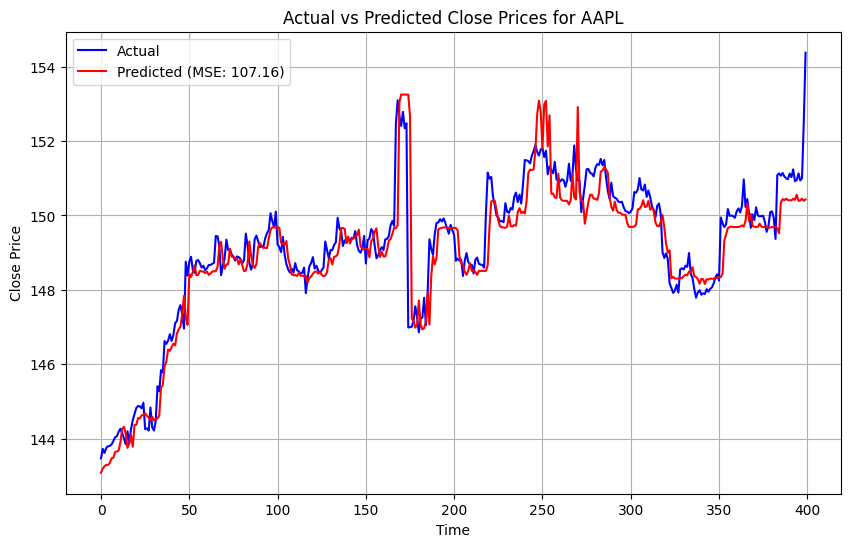

In [155]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def preprocess_data(df):
    df['lag_1'] = df['close'].shift(1)
    df['lag_2'] = df['close'].shift(2)
    df['moving_avg_5'] = df['close'].rolling(window=5).mean()
    df['moving_avg_10'] = df['close'].rolling(window=10).mean()
    df['percent_change'] = df['close'].pct_change()
    df['target'] = df['close'].shift(-1)
    df = df.dropna()

    return df

aapl_df = preprocess_data(aapl_df)

features = ['lag_1', 'lag_2', 'moving_avg_5', 'moving_avg_10', 'percent_change']
X = aapl_df[features]
y = aapl_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

start, end = 0, 400

y_test_range = y_test.iloc[start:end]
y_pred_range = y_pred[start:end]

plt.figure(figsize=(10, 6))
plt.plot(y_test_range.values, label='Actual', color='blue')
plt.plot(y_pred_range, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices for AAPL')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

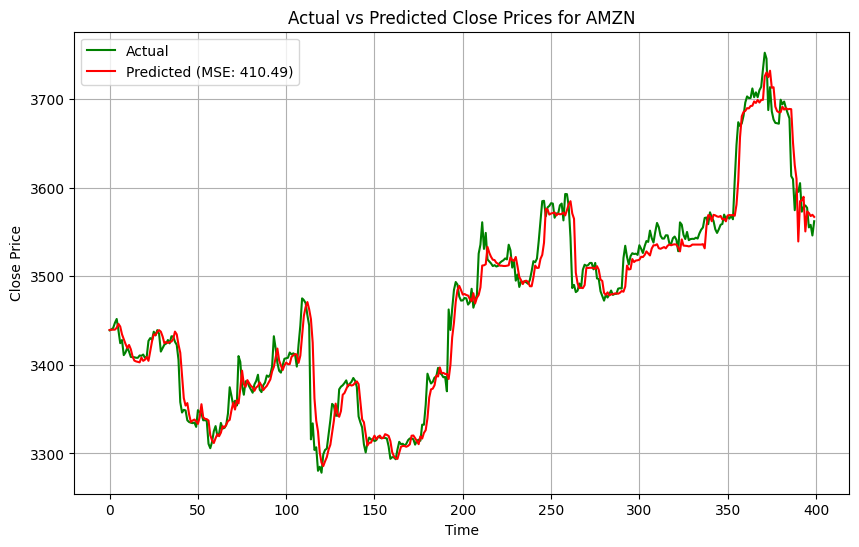

In [160]:
amzn_df = preprocess_data(amzn_df)

features = ['lag_1', 'lag_2', 'moving_avg_5', 'moving_avg_10', 'percent_change']
X = amzn_df[features]
y = amzn_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=6)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

start, end = 0, 400

y_test_range = y_test.iloc[start:end]
y_pred_range = y_pred[start:end]

plt.figure(figsize=(10, 6))
plt.plot(y_test_range.values, label='Actual', color='green')
plt.plot(y_pred_range, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices for AMZN')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

Mean Squared Error: 4.660309189332515


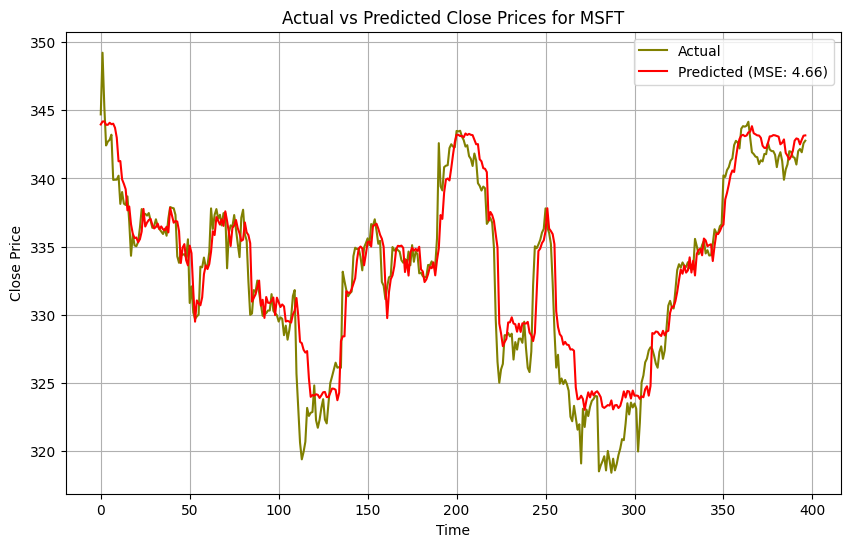

In [163]:
msft_df = preprocess_data(msft_df)

features = ['lag_1', 'lag_2', 'moving_avg_5', 'moving_avg_10', 'percent_change']
X = msft_df[features]
y = msft_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=8)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='olive')
plt.plot(y_pred, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices for MSFT')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

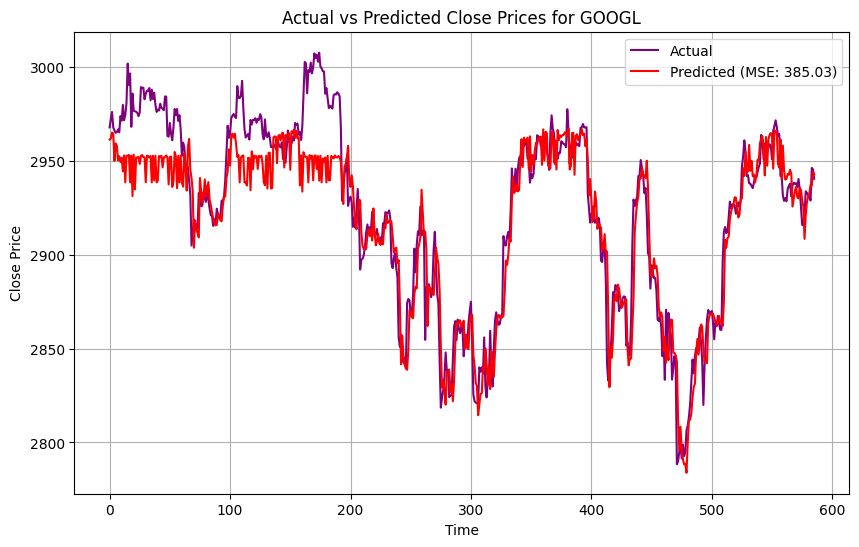

In [166]:
googl_df = preprocess_data(googl_df)

features = ['lag_1', 'lag_2', 'moving_avg_5', 'moving_avg_10', 'percent_change']
X = googl_df[features]
y = googl_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='purple')
plt.plot(y_pred, label=f'Predicted (MSE: {mse:.2f})', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices for GOOGL')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()